<h2>Simulation and analysis of the card game "No Thanks"</h2>

Import game simulator code from Table.py. Also import numpy for data analysis and matpltlib for plots.

In [33]:
%matplotlib inline

from table import Table
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from statistics import mean, median_low

Select the number of players and the number of games to simulate.

In [34]:
num_players = 3
num_games = 10000

Run the simulation and collect the data.

In [35]:
game_data = []
for i in range(num_games):
    mytable = Table(num_ai_players=num_players, verbose=0)
    mytable.play()
    game_data.append(mytable.score())

The output of Table.score() is a list of lists containing the following data for each player in the game:

<table>
   <tr>
      <td>Index</td> <td>Description</td>
   </tr>
   <tr>
      <td><div align="center">0</div></td> <td>Player position, indexed from 0 (i.e. the player who went first has position 0)</td>
   </tr>
   <tr>
      <td><div align="center">1</div></td> <td>Lost = 0<br>Won = 1<br>Tied = 2</td>
   </tr>
   <tr>
      <td><div align="center">2</div></td> <td>Final score (int)</td>
   </tr>
   <tr>
      <td><div align="center">3</div></td> <td>Initial threshold (int)</td>
   </tr>
   <tr>
      <td><div align="center">4</div></td> <td>Token threshold (int)</td>
   </tr>
   <tr>
      <td><div align="center">5</div></td> <td>Effective value threshold (int)</td>
   </tr>
   <tr>
      <td><div align="center">6</div></td> <td>Pot threshold (int)</td>
   </tr>
   <tr>
      <td><div align="center">7</div></td> <td>Token history (list of ints)</td>
   </tr>
   <tr>
      <td><div align="center">8</div></td> <td>Effective value history (list of ints)</td>
   </tr>
   <tr>
       <td><div align="center">9</div></td> <td>Player's cards, in the order in which they were obtained (list of ints)</td>
   </tr>
</table>

Remove (pop) the list of cards from every player's data, separating them into a list of winning hands and a list of losing hands.

In [36]:
winning_cards = []
losing_cards = []
for game in game_data:
    for player_data in game:
        if player_data[1] > 0:
            winning_cards.append(player_data.pop())
        else:
            losing_cards.append(player_data.pop())

Do winning players tend to take more or fewer cards than losing players?

In [38]:
win_len = []
lose_len = []
for hand in winning_cards:
    win_len.append(len(hand))
for hand in losing_cards:
    lose_len.append(len(hand))
print("Average number of cards in winning hands:", mean(win_len), \
      "\nAverage number of cards in losing hands:", mean(lose_len), \
      "\n\nMedian number of cards in winning hands:", median_low(win_len), \
      "\nMedian number of cards in losing hands:", median_low(lose_len))

Average number of cards in winning hands: 7.978418677653521 
Average number of cards in losing hands: 8.01110774512774 

Median number of cards in winning hands: 8 
Median number of cards in losing hands: 8


<em>In 10,000 three-player games, I find virtually no difference between the number of cards taken by winning players and the number of cards taken by losing players. The number of cards taken is generally evenly distributed, with each of the three players taking approximately one-third of the cards. The number of cards taken does not seem to be predictive of a winning strategy.</em>

Visualize the distribution of cards in winning and losing final hands: calculate and plot the percent of hands that contain each card (3-35).

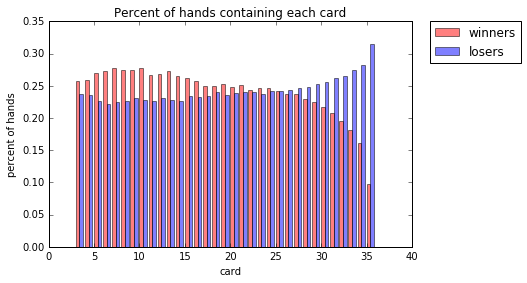

In [41]:
card_counts_win = Counter()
card_counts_lose = Counter()
num_win = len(winning_cards)
num_lose = len(losing_cards)
for hand in winning_cards:
    for card in hand:
        card_counts_win[card] += 1
for hand in losing_cards:
    for card in hand:
        card_counts_lose[card] += 1
win_labels, win_values = zip(*card_counts_win.items())
lose_labels, lose_values = zip(*card_counts_lose.items())
bar_width = 0.4
opacity = 0.5
win_plt = plt.bar(win_labels, [value / num_win for value in win_values], bar_width, alpha=opacity, color='r', \
                  label='winners')
lose_plt = plt.bar([label + bar_width for label in lose_labels], [value / num_lose for value in lose_values], \
                   bar_width, alpha=opacity, color='b', label='losers')
plt.xlabel('card')
plt.ylabel('percent of hands')
plt.title('Percent of hands containing each card')
#plt.xticks([label + bar_width for label in lose_labels], lose_labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

<em>The percentage of winning hands containing the 35 is less than a third of the percentage of losing hands containing the 35.</em>

CODE BELOW THIS BOX IS NOT VALID, was based on old version of game data output

In [3]:
#cards = []
won = []
lost = []
for i in range(num_games):
    mytable = Table(num_ai_players=num_players, verbose=0)
    mytable.play()
    game_data = mytable.score()
    for j in range(num_players):
        #cards.append(game_data[j].pop())
        if game_data[j][1] > 0:
            won.append(game_data[j])
        else:
            lost.append(game_data[j])
df_won = pd.DataFrame(data=np.array(won), \
                    columns=['pos', 'won', 'score', 'init_thr', 'tok_thr', 'eff_val', 'pot_thr', \
                             'min_tok', 'max_tok', 'avg_tok', 'med_tok', \
                             'min_efv', 'max_efv', 'avg_efv', 'med_efv', \
                             'num_cards', 'num_runs', 'first_card', 'min_card', 'max_card', 'avg_card', 'med_card'])
df_lost = pd.DataFrame(data=np.array(lost), \
                    columns=['pos', 'won', 'score', 'init_thr', 'tok_thr', 'eff_val', 'pot_thr', \
                             'min_tok', 'max_tok', 'avg_tok', 'med_tok', \
                             'min_efv', 'max_efv', 'avg_efv', 'med_efv', \
                             'num_cards', 'num_runs', 'first_card', 'min_card', 'max_card', 'avg_card', 'med_card'])

Investigate the range of values present in some of the feature columns.

In [26]:
df_won['max_tok'].describe()
#df_won.loc[df_won['max_tok'] == 10]

count    10178.000000
mean        22.911869
std          5.108107
min         11.000000
25%         19.000000
50%         23.000000
75%         27.000000
max         33.000000
Name: max_tok, dtype: float64

In [27]:
df_lost['max_tok'].describe()

count    19822.000000
mean        18.844516
std          5.232300
min         11.000000
25%         15.000000
50%         19.000000
75%         23.000000
max         33.000000
Name: max_tok, dtype: float64

In [28]:
x = df_won['max_tok'].median()
y = df_lost['max_tok'].median()
print("winner median:", x, "\nloser median:", y)

winner median: 23.0 
loser median: 19.0


Does player position confer an advantage?

In [4]:
won_pos = df_won['pos'].value_counts(sort=False).to_frame()
won_pos.columns = ['count']
won_pos['percent'] = 100*won_pos['count']/won_pos['count'].sum()
won_pos

,count,percent
0,3313,32.563397
1,3394,33.359544
2,3467,34.077059


In [5]:
lost_pos = df_lost['pos'].value_counts(sort=False).to_frame()
lost_pos.columns = ['count']
lost_pos['percent'] = 100*lost_pos['count']/lost_pos['count'].sum()
lost_pos

,count,percent
0,6687,33.728437
1,6606,33.319883
2,6533,32.951680


In [31]:
df_won['tok_thr'].describe()

count    10178.000000
mean         5.224700
std          3.136367
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: tok_thr, dtype: float64

In [13]:
df_lost['tok_thr'].describe()

count    19797.000000
mean         4.880942
std          3.180773
min          0.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: tok_thr, dtype: float64

In [6]:
df_won['eff_val'].describe()

count    10174.000000
mean         4.296442
std          2.576042
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          8.000000
Name: eff_val, dtype: float64

In [7]:
df_lost['eff_val'].describe()

count    19826.000000
mean         3.841572
std          2.566398
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          8.000000
Name: eff_val, dtype: float64

In [8]:
df_won['init_thr'].describe()

count    10174.000000
mean        17.516906
std          9.039547
min          3.000000
25%         10.000000
50%         17.000000
75%         25.000000
max         34.000000
Name: init_thr, dtype: float64

In [9]:
df_lost['init_thr'].describe()

count    19826.00000
mean        18.97241
std          9.26692
min          3.00000
25%         11.00000
50%         19.00000
75%         27.00000
max         34.00000
Name: init_thr, dtype: float64